/var/folders/vy/gs0q2mqj2j3136f_ks_rr4mr0000gn/T/ipykernel_38990/487431582.py:5: DtypeWarning:

Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.



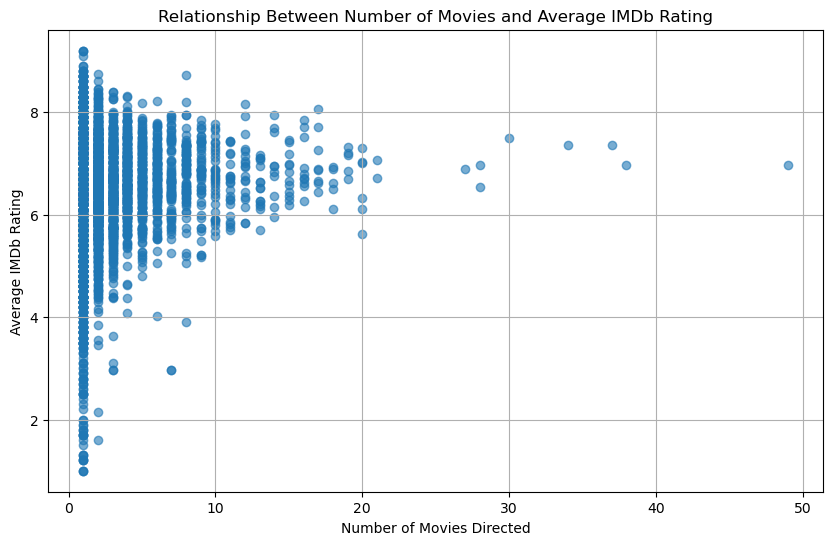

<Figure size 1000x600 with 0 Axes>

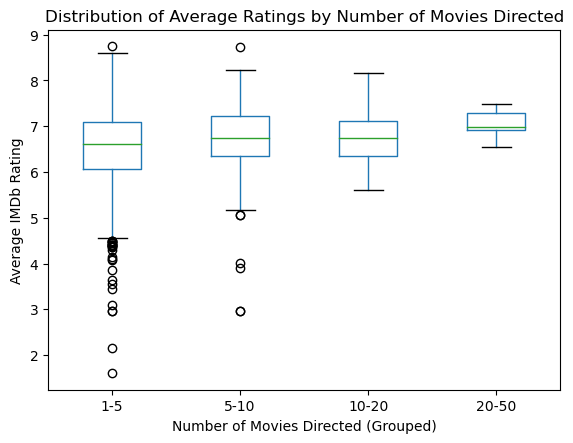

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
title_basics = pd.read_csv('title.basics.tsv', sep='\t', na_values='\\N')
title_crew = pd.read_csv('title.crew.tsv', sep='\t', na_values='\\N')
title_ratings = pd.read_csv('title.ratings.tsv', sep='\t', na_values='\\N')

# Filter for only movies
movies = title_basics[title_basics['titleType'] == 'movie']

# Merge datasets to include ratings and filter out movies with fewer than 10,000 ratings
movies_with_ratings = movies.merge(title_ratings, on='tconst', how='inner')
movies_with_ratings = movies_with_ratings[movies_with_ratings['numVotes'] >= 10000]

# Merge with crew information
movies_with_directors = movies_with_ratings.merge(title_crew[['tconst', 'directors']], on='tconst', how='inner')

# Split directors column (as it might contain multiple directors) and expand the dataframe
movies_with_directors['directors'] = movies_with_directors['directors'].str.split(',')
movies_expanded = movies_with_directors.explode('directors')

# Calculate number of movies directed by each director
director_movie_count = movies_expanded.groupby('directors').size().reset_index(name='movie_count')

# Calculate average rating per director
director_avg_rating = movies_expanded.groupby('directors')['averageRating'].mean().reset_index(name='average_rating')

# Merge the count and average rating data
director_stats = director_movie_count.merge(director_avg_rating, on='directors')

# Plot 1: Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(director_stats['movie_count'], director_stats['average_rating'], alpha=0.6)
plt.title('Relationship Between Number of Movies and Average IMDb Rating')
plt.xlabel('Number of Movies Directed')
plt.ylabel('Average IMDb Rating')
plt.grid(True)
plt.show()

# Plot 2: Box Plot to show distribution of average ratings across movie count groups
director_stats['movie_count_group'] = pd.cut(director_stats['movie_count'], bins=[1, 5, 10, 20, 50], labels=['1-5','5-10', '10-20', '20-50'])

plt.figure(figsize=(10, 6))
director_stats.boxplot(column='average_rating', by='movie_count_group', grid=False)
plt.title('Distribution of Average Ratings by Number of Movies Directed')
plt.xlabel('Number of Movies Directed (Grouped)')
plt.ylabel('Average IMDb Rating')
plt.suptitle('')
plt.show()


In the scatter plot, we observe a relationship between the number of movies directed and the average IMDb rating. Directors with a small number of movies (e.g., between 5-10) show a wide rating distribution with high volatility, ranging from low to high ratings. As the number of movies directed increases, ratings become more concentrated, with reduced volatility. Ultimately, the ratings of prolific directors (those who directed more movies) cluster mostly in the mid-to-high range, with few occurrences of extremely high or low ratings.

In the box plot, directors are grouped by the number of movies they have directed, which provides a clearer view of rating trends. As the number of movies directed grows, the median rating in each group remains relatively stable, while the interquartile range becomes narrower. This suggests that as directors produce more movies, the range of rating fluctuations decreases, resulting in more consistent ratings.

Since the median rating stays consistent across groups as the number of movies directed increases, we can conclude that a higher output does not have a strong impact on the average quality of movies. Instead, it contributes to a decrease in rating variability, making ratings more stable among prolific directors.

One possible reason for this trend of decreasing rating fluctuations among prolific directors is that there are relatively few directors who have directed a large number of movies. These prolific directors often have significant experience and a stable audience base, which contributes to lower rating volatility. The scarcity of prolific directors means that their ratings tend to be more stable, with fewer extreme highs or lows. Therefore, the observed stability in ratings can largely be attributed to the small sample size of prolific directors rather than purely their consistent quality or style. In contrast, directors with fewer movies are more numerous and may experiment with different styles, resulting in more varied quality and greater rating volatility.

